In [4]:
import logging
import backtrader as bt
from datetime import datetime

from Commissions import CommInfo_Futures_Perc_Mult
from Parser import parse_args
from Datasets import *
from Strategies import StochMACD
from utils import print_sqn, print_trade_analysis

def runstrat(args=None):
    leverage = 5
    
    cerebro = bt.Cerebro(optreturn=False)
    cerebro.broker.set_shortcash(False)
    cerebro.broker.set_cash(5000)
    cerebro.broker.setcommission(commission=0.00015, leverage=leverage)

    dataname = DATASETS.get('btc_hourly')
    data = bt.feeds.GenericCSVData(
        dataname=dataname,
        fromdate=datetime(2018,2,1),
        todate=datetime(2021,6,1),
#         fromdate=datetime(2021,1,1),
#         todate=datetime(2021,6,1),
        timeframe=bt.TimeFrame.Minutes,
        nullvalue=0.0,
        datetime=0,
        open=4,
        high=5,
        low=6,
        close=7,
        volume=8,
        compression=60,
        headers=True,
    )

    cerebro.adddata(data)

    # cerebro.addsizer(bt.sizers.SizerFix, stake=args.stake)
    # cerebro.addsizer(bt.sizers.PercentSizer, percents=args.cashperc)

    # cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio', timeframe=bt.TimeFrame.Minutes, compression=60)
    # cerebro.addanalyzer(bt.analyzers.Returns, _name='returns', timeframe=bt.TimeFrame.Minutes, compression=60)
    cerebro.addanalyzer(bt.analyzers.VWR, _name='vwr', timeframe=bt.TimeFrame.Minutes, compression=60)
    
    cerebro.addobserver(bt.observers.Value)
    
    cerebro.addstrategy(StochMACD, 
        macd1=9,
        macd2=21,
        macdsig=8,
        atrdist=5,
        reversal_sensitivity=19,
        short_perc=1,
        leverage=leverage,
        loglevel=logging.DEBUG,
    )

    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
    cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")

    initial_value = cerebro.broker.getvalue()
    print('Starting Portfolio Value: %.2f' % initial_value)
    result = cerebro.run()

    # Print analyzers - results
    final_value = cerebro.broker.getvalue()
    print('Final Portfolio Value: %.2f' % final_value)
    print('Profit %.3f%%' % ((final_value - initial_value) / initial_value * 100))
    print_trade_analysis(result[0].analyzers.ta.get_analysis())
    print_sqn(result[0].analyzers.sqn.get_analysis())
    
    return cerebro

cerebro = runstrat()


Starting Portfolio Value: 5000.00


DEBUG:root:2018-02-03 06:00:00, BUY CREATE, 8715.00
DEBUG:root:2018-02-03 06:00:00, === buy cerebro cash 5000.0
DEBUG:root:2018-02-03 06:00:00, === buy size, 1.4343086632243258
INFO:root:2018-02-03 07:00:00, BUY EXECUTED: ENTRY LONG Order, Amount: 1.43, Price: 8715.0000, Cost: 12500.0000, Comm 1.87
DEBUG:root:2018-02-03 07:00:00, Close, 8708.82
DEBUG:root:2018-02-03 07:00:00, ATR: 286.35
DEBUG:root:2018-02-03 07:00:00, previous stoch RSI: 49.89
DEBUG:root:2018-02-03 07:00:00, current stoch RSI: 73.08
DEBUG:root:2018-02-03 07:00:00, fastk: 73.08
DEBUG:root:2018-02-03 07:00:00, fastd: 47.19
DEBUG:root:2018-02-03 07:00:00, 
INFO:root:2018-02-05 15:00:00, SELL EXECUTED: STOPLOSS for LONG, Amount: -1.43, Price: 7233.58632, Cost: 12500.00000, Comm 1.55628
DEBUG:root:2018-02-05 15:00:00, Close, 7384.85
DEBUG:root:2018-02-05 15:00:00, ATR: 269.04
DEBUG:root:2018-02-05 15:00:00, previous stoch RSI: 17.74
DEBUG:root:2018-02-05 15:00:00, current stoch RSI: 13.83
DEBUG:root:2018-02-05 15:00:00, fa

DEBUG:root:2018-02-27 02:00:00, fastd: 58.90
DEBUG:root:2018-02-27 02:00:00, 
INFO:root:2018-02-27 02:00:00, SELL EXECUTED: CLOSE, Amount: -1.52, Price: 10195.00000, Cost: 15292.45039, Comm 2.32349
DEBUG:root:2018-02-27 02:00:00, Close, 10149.64
DEBUG:root:2018-02-27 02:00:00, ATR: 158.12
DEBUG:root:2018-02-27 02:00:00, previous stoch RSI: 56.91
DEBUG:root:2018-02-27 02:00:00, current stoch RSI: 29.82
DEBUG:root:2018-02-27 02:00:00, fastk: 29.82
DEBUG:root:2018-02-27 02:00:00, fastd: 58.90
DEBUG:root:2018-02-27 02:00:00, 
INFO:root:2018-02-27 02:00:00, SELL EXECUTED: ENTRY SHORT Order, Amount: -0.01, Price: 10195.00000, Cost: 76.68717, Comm 0.01150
DEBUG:root:2018-02-27 02:00:00, Close, 10149.64
DEBUG:root:2018-02-27 02:00:00, ATR: 158.12
DEBUG:root:2018-02-27 02:00:00, previous stoch RSI: 56.91
DEBUG:root:2018-02-27 02:00:00, current stoch RSI: 29.82
DEBUG:root:2018-02-27 02:00:00, fastk: 29.82
DEBUG:root:2018-02-27 02:00:00, fastd: 58.90
DEBUG:root:2018-02-27 02:00:00, 
INFO:root:201

DEBUG:root:2018-04-20 10:00:00, Close, 8488.01
DEBUG:root:2018-04-20 10:00:00, ATR: 84.16
DEBUG:root:2018-04-20 10:00:00, previous stoch RSI: 35.35
DEBUG:root:2018-04-20 10:00:00, current stoch RSI: 53.63
DEBUG:root:2018-04-20 10:00:00, fastk: 53.63
DEBUG:root:2018-04-20 10:00:00, fastd: 42.01
DEBUG:root:2018-04-20 10:00:00, 
INFO:root:2018-04-20 10:00:00, OPERATION PROFIT: GROSS -5.75, NET -5.77
DEBUG:root:2018-04-22 06:00:00, BUY CREATE, 8887.07
DEBUG:root:2018-04-22 06:00:00, === buy cerebro cash 6871.042305058447
DEBUG:root:2018-04-22 06:00:00, === buy size, 1.9328761630825593
INFO:root:2018-04-22 07:00:00, BUY EXECUTED: ENTRY LONG Order, Amount: 1.93, Price: 8887.0700, Cost: 17177.6058, Comm 2.58
DEBUG:root:2018-04-22 07:00:00, Close, 8875.00
DEBUG:root:2018-04-22 07:00:00, ATR: 83.37
DEBUG:root:2018-04-22 07:00:00, previous stoch RSI: 27.66
DEBUG:root:2018-04-22 07:00:00, current stoch RSI: 32.61
DEBUG:root:2018-04-22 07:00:00, fastk: 32.61
DEBUG:root:2018-04-22 07:00:00, fastd: 

DEBUG:root:2018-06-26 22:00:00, fastk: 49.30
DEBUG:root:2018-06-26 22:00:00, fastd: 36.02
DEBUG:root:2018-06-26 22:00:00, 
INFO:root:2018-06-26 22:00:00, BUY EXECUTED: CLOSE, Amount: 0.02, Price: 6211.0900, Cost: 162.9014, Comm 0.02
DEBUG:root:2018-06-26 22:00:00, Close, 6155.75
DEBUG:root:2018-06-26 22:00:00, ATR: 51.27
DEBUG:root:2018-06-26 22:00:00, previous stoch RSI: 44.81
DEBUG:root:2018-06-26 22:00:00, current stoch RSI: 49.30
DEBUG:root:2018-06-26 22:00:00, fastk: 49.30
DEBUG:root:2018-06-26 22:00:00, fastd: 36.02
DEBUG:root:2018-06-26 22:00:00, 
INFO:root:2018-06-26 22:00:00, BUY EXECUTED: ENTRY LONG Order, Amount: 2.61, Price: 6211.0900, Cost: 16208.6240, Comm 2.43
DEBUG:root:2018-06-26 22:00:00, Close, 6155.75
DEBUG:root:2018-06-26 22:00:00, ATR: 51.27
DEBUG:root:2018-06-26 22:00:00, previous stoch RSI: 44.81
DEBUG:root:2018-06-26 22:00:00, current stoch RSI: 49.30
DEBUG:root:2018-06-26 22:00:00, fastk: 49.30
DEBUG:root:2018-06-26 22:00:00, fastd: 36.02
DEBUG:root:2018-06-26

DEBUG:root:2018-09-15 19:00:00, fastk: 58.43
DEBUG:root:2018-09-15 19:00:00, fastd: 78.32
DEBUG:root:2018-09-15 19:00:00, 
INFO:root:2018-09-15 19:00:00, SELL EXECUTED: CLOSE, Amount: -3.69, Price: 6523.02000, Cost: 23216.46087, Comm 3.60831
DEBUG:root:2018-09-15 19:00:00, Close, 6530.00
DEBUG:root:2018-09-15 19:00:00, ATR: 36.89
DEBUG:root:2018-09-15 19:00:00, previous stoch RSI: 76.53
DEBUG:root:2018-09-15 19:00:00, current stoch RSI: 58.43
DEBUG:root:2018-09-15 19:00:00, fastk: 58.43
DEBUG:root:2018-09-15 19:00:00, fastd: 78.32
DEBUG:root:2018-09-15 19:00:00, 
INFO:root:2018-09-15 19:00:00, SELL EXECUTED: ENTRY SHORT Order, Amount: -0.02, Price: 6523.02000, Cost: 116.70511, Comm 0.01751
DEBUG:root:2018-09-15 19:00:00, Close, 6530.00
DEBUG:root:2018-09-15 19:00:00, ATR: 36.89
DEBUG:root:2018-09-15 19:00:00, previous stoch RSI: 76.53
DEBUG:root:2018-09-15 19:00:00, current stoch RSI: 58.43
DEBUG:root:2018-09-15 19:00:00, fastk: 58.43
DEBUG:root:2018-09-15 19:00:00, fastd: 78.32
DEBUG:

DEBUG:root:2018-11-09 10:00:00, fastd: 62.41
DEBUG:root:2018-11-09 10:00:00, 
INFO:root:2018-11-09 10:00:00, SELL EXECUTED: CLOSE, Amount: -3.97, Price: 6437.02000, Cost: 25531.92184, Comm 3.82979
DEBUG:root:2018-11-09 10:00:00, Close, 6435.00
DEBUG:root:2018-11-09 10:00:00, ATR: 24.15
DEBUG:root:2018-11-09 10:00:00, previous stoch RSI: 62.41
DEBUG:root:2018-11-09 10:00:00, current stoch RSI: 29.08
DEBUG:root:2018-11-09 10:00:00, fastk: 29.08
DEBUG:root:2018-11-09 10:00:00, fastd: 62.41
DEBUG:root:2018-11-09 10:00:00, 
INFO:root:2018-11-09 10:00:00, SELL EXECUTED: ENTRY SHORT Order, Amount: -0.02, Price: 6437.02000, Cost: 125.02686, Comm 0.01875
DEBUG:root:2018-11-09 10:00:00, Close, 6435.00
DEBUG:root:2018-11-09 10:00:00, ATR: 24.15
DEBUG:root:2018-11-09 10:00:00, previous stoch RSI: 62.41
DEBUG:root:2018-11-09 10:00:00, current stoch RSI: 29.08
DEBUG:root:2018-11-09 10:00:00, fastk: 29.08
DEBUG:root:2018-11-09 10:00:00, fastd: 62.41
DEBUG:root:2018-11-09 10:00:00, 
INFO:root:2018-11-

DEBUG:root:2019-03-12 09:00:00, current stoch RSI: 66.67
DEBUG:root:2019-03-12 09:00:00, fastk: 66.67
DEBUG:root:2019-03-12 09:00:00, fastd: 33.33
DEBUG:root:2019-03-12 09:00:00, 
INFO:root:2019-03-12 09:00:00, OPERATION PROFIT: GROSS 0.15, NET 0.09
DEBUG:root:2019-03-17 23:00:00, REVERSAL SELL, 3981.14
DEBUG:root:2019-03-17 23:00:00, === sell cerebro cash 9023.87654505681
DEBUG:root:2019-03-17 23:00:00, === sell size, 0.05666641053226469
INFO:root:2019-03-18 00:00:00, Order Canceled: STOPLOSS for LONG
DEBUG:root:2019-03-18 00:00:00, Close, 4005.02
DEBUG:root:2019-03-18 00:00:00, ATR: 15.61
DEBUG:root:2019-03-18 00:00:00, previous stoch RSI: 50.30
DEBUG:root:2019-03-18 00:00:00, current stoch RSI: 50.30
DEBUG:root:2019-03-18 00:00:00, fastk: 50.30
DEBUG:root:2019-03-18 00:00:00, fastd: 61.41
DEBUG:root:2019-03-18 00:00:00, 
INFO:root:2019-03-18 00:00:00, SELL EXECUTED: CLOSE, Amount: -11.59, Price: 3981.14000, Cost: 44948.69227, Comm 6.91866
DEBUG:root:2019-03-18 00:00:00, Close, 4005.

DEBUG:root:2019-05-16 05:00:00, fastk: 24.43
DEBUG:root:2019-05-16 05:00:00, fastd: 56.33
DEBUG:root:2019-05-16 05:00:00, 
INFO:root:2019-05-16 05:00:00, SELL EXECUTED: CLOSE, Amount: -14.47, Price: 7978.83000, Cost: 78074.86901, Comm 17.31380
DEBUG:root:2019-05-16 05:00:00, Close, 8002.09
DEBUG:root:2019-05-16 05:00:00, ATR: 131.85
DEBUG:root:2019-05-16 05:00:00, previous stoch RSI: 55.69
DEBUG:root:2019-05-16 05:00:00, current stoch RSI: 24.43
DEBUG:root:2019-05-16 05:00:00, fastk: 24.43
DEBUG:root:2019-05-16 05:00:00, fastd: 56.33
DEBUG:root:2019-05-16 05:00:00, 
INFO:root:2019-05-16 05:00:00, SELL EXECUTED: ENTRY SHORT Order, Amount: -0.05, Price: 7978.83000, Cost: 392.69443, Comm 0.05890
DEBUG:root:2019-05-16 05:00:00, Close, 8002.09
DEBUG:root:2019-05-16 05:00:00, ATR: 131.85
DEBUG:root:2019-05-16 05:00:00, previous stoch RSI: 55.69
DEBUG:root:2019-05-16 05:00:00, current stoch RSI: 24.43
DEBUG:root:2019-05-16 05:00:00, fastk: 24.43
DEBUG:root:2019-05-16 05:00:00, fastd: 56.33
DE

DEBUG:root:2019-07-09 08:00:00, Close, 12533.39
DEBUG:root:2019-07-09 08:00:00, ATR: 175.29
DEBUG:root:2019-07-09 08:00:00, previous stoch RSI: 55.95
DEBUG:root:2019-07-09 08:00:00, current stoch RSI: 34.93
DEBUG:root:2019-07-09 08:00:00, fastk: 34.93
DEBUG:root:2019-07-09 08:00:00, fastd: 60.06
DEBUG:root:2019-07-09 08:00:00, 
INFO:root:2019-07-09 08:00:00, OPERATION PROFIT: GROSS 80998.24, NET 80874.40
DEBUG:root:2019-07-17 05:00:00, REVERSAL BUY, 9553.45
DEBUG:root:2019-07-17 05:00:00, === buy cerebro cash 230694.71792162862
DEBUG:root:2019-07-17 05:00:00, === buy size, 60.36947854482637
INFO:root:2019-07-17 06:00:00, Order Canceled: STOPLOSS for SHORT
DEBUG:root:2019-07-17 06:00:00, Close, 9519.00
DEBUG:root:2019-07-17 06:00:00, ATR: 205.30
DEBUG:root:2019-07-17 06:00:00, previous stoch RSI: 49.92
DEBUG:root:2019-07-17 06:00:00, current stoch RSI: 73.68
DEBUG:root:2019-07-17 06:00:00, fastk: 73.68
DEBUG:root:2019-07-17 06:00:00, fastd: 47.38
DEBUG:root:2019-07-17 06:00:00, 
INFO:ro

DEBUG:root:2019-08-13 16:00:00, fastk: 0.00
DEBUG:root:2019-08-13 16:00:00, fastd: 0.67
DEBUG:root:2019-08-13 16:00:00, 
DEBUG:root:2019-08-28 18:00:00, REVERSAL SELL, 9720.69
DEBUG:root:2019-08-28 18:00:00, === sell cerebro cash 220666.94373254286
DEBUG:root:2019-08-28 18:00:00, === sell size, 0.5675187248347155
INFO:root:2019-08-28 19:00:00, SELL EXECUTED: CLOSE, Amount: -0.62, Price: 9720.69000, Cost: 7105.94256, Comm 0.90867
DEBUG:root:2019-08-28 19:00:00, Close, 9683.94
DEBUG:root:2019-08-28 19:00:00, ATR: 110.54
DEBUG:root:2019-08-28 19:00:00, previous stoch RSI: 54.26
DEBUG:root:2019-08-28 19:00:00, current stoch RSI: 23.42
DEBUG:root:2019-08-28 19:00:00, fastk: 23.42
DEBUG:root:2019-08-28 19:00:00, fastd: 55.09
DEBUG:root:2019-08-28 19:00:00, 
INFO:root:2019-08-28 19:00:00, SELL EXECUTED: ENTRY SHORT Order, Amount: -0.57, Price: 9720.69000, Cost: 5516.67359, Comm 0.82750
DEBUG:root:2019-08-28 19:00:00, Close, 9683.94
DEBUG:root:2019-08-28 19:00:00, ATR: 110.54
DEBUG:root:2019-0

DEBUG:root:2019-11-27 12:00:00, fastk: 70.30
DEBUG:root:2019-11-27 12:00:00, fastd: 36.97
DEBUG:root:2019-11-27 12:00:00, 
INFO:root:2019-11-27 12:00:00, OPERATION PROFIT: GROSS -52.44, NET -53.90
DEBUG:root:2019-12-04 20:00:00, REVERSAL SELL, 7193.16
DEBUG:root:2019-12-04 20:00:00, === sell cerebro cash 97343.2958425995
DEBUG:root:2019-12-04 20:00:00, === sell size, 0.3383189580191442
INFO:root:2019-12-04 21:00:00, Order Canceled: STOPLOSS for LONG
DEBUG:root:2019-12-04 21:00:00, Close, 7181.12
DEBUG:root:2019-12-04 21:00:00, ATR: 100.16
DEBUG:root:2019-12-04 21:00:00, previous stoch RSI: 67.30
DEBUG:root:2019-12-04 21:00:00, current stoch RSI: 37.55
DEBUG:root:2019-12-04 21:00:00, fastk: 37.55
DEBUG:root:2019-12-04 21:00:00, fastd: 64.78
DEBUG:root:2019-12-04 21:00:00, 
INFO:root:2019-12-04 21:00:00, SELL EXECUTED: CLOSE, Amount: -67.50, Price: 7193.16000, Cost: 482495.01375, Comm 72.83415
DEBUG:root:2019-12-04 21:00:00, Close, 7181.12
DEBUG:root:2019-12-04 21:00:00, ATR: 100.16
DEBU

DEBUG:root:2020-01-14 13:00:00, ATR: 71.21
DEBUG:root:2020-01-14 13:00:00, previous stoch RSI: 77.41
DEBUG:root:2020-01-14 13:00:00, current stoch RSI: 70.42
DEBUG:root:2020-01-14 13:00:00, fastk: 70.42
DEBUG:root:2020-01-14 13:00:00, fastd: 76.42
DEBUG:root:2020-01-14 13:00:00, 
INFO:root:2020-01-14 18:00:00, BUY EXECUTED: STOPLOSS for SHORT, Amount: 0.60, Price: 8848.7573, Cost: 5086.4605, Comm 0.79
DEBUG:root:2020-01-14 18:00:00, Close, 8769.35
DEBUG:root:2020-01-14 18:00:00, ATR: 105.48
DEBUG:root:2020-01-14 18:00:00, previous stoch RSI: 82.27
DEBUG:root:2020-01-14 18:00:00, current stoch RSI: 89.33
DEBUG:root:2020-01-14 18:00:00, fastk: 89.33
DEBUG:root:2020-01-14 18:00:00, fastd: 84.11
DEBUG:root:2020-01-14 18:00:00, 
INFO:root:2020-01-14 18:00:00, OPERATION PROFIT: GROSS -208.71, NET -210.26
DEBUG:root:2020-03-17 23:00:00, SELL CREATE, 5312.64
DEBUG:root:2020-03-17 23:00:00, === sell cerebro cash 203248.15915537684
DEBUG:root:2020-03-17 23:00:00, === sell size, 0.956436720516432

DEBUG:root:2020-05-30 23:00:00, ATR: 75.95
DEBUG:root:2020-05-30 23:00:00, previous stoch RSI: 45.83
DEBUG:root:2020-05-30 23:00:00, current stoch RSI: 74.67
DEBUG:root:2020-05-30 23:00:00, fastk: 74.67
DEBUG:root:2020-05-30 23:00:00, fastd: 46.42
DEBUG:root:2020-05-30 23:00:00, 
INFO:root:2020-05-30 23:00:00, OPERATION PROFIT: GROSS 43.87, NET 43.11
INFO:root:2020-06-02 15:00:00, SELL EXECUTED: STOPLOSS for LONG, Amount: -111.58, Price: 9359.64693, Cost: 1085544.97220, Comm 156.64998
DEBUG:root:2020-06-02 15:00:00, Close, 9468.81
DEBUG:root:2020-06-02 15:00:00, ATR: 138.23
DEBUG:root:2020-06-02 15:00:00, previous stoch RSI: 11.71
DEBUG:root:2020-06-02 15:00:00, current stoch RSI: 10.74
DEBUG:root:2020-06-02 15:00:00, fastk: 10.74
DEBUG:root:2020-06-02 15:00:00, fastd: 11.39
DEBUG:root:2020-06-02 15:00:00, 
INFO:root:2020-06-02 15:00:00, OPERATION PROFIT: GROSS -41211.78, NET -41531.26
DEBUG:root:2020-06-09 11:00:00, BUY CREATE, 9721.24
DEBUG:root:2020-06-09 11:00:00, === buy cerebro c

DEBUG:root:2020-10-01 16:00:00, current stoch RSI: 2.92
DEBUG:root:2020-10-01 16:00:00, fastk: 2.92
DEBUG:root:2020-10-01 16:00:00, fastd: 11.38
DEBUG:root:2020-10-01 16:00:00, 
INFO:root:2020-10-01 16:00:00, OPERATION PROFIT: GROSS -20666.24, NET -20915.06
DEBUG:root:2020-10-12 13:00:00, BUY CREATE, 11489.08
DEBUG:root:2020-10-12 13:00:00, === buy cerebro cash 314978.8063165147
DEBUG:root:2020-10-12 13:00:00, === buy size, 68.53873554638724
INFO:root:2020-10-12 14:00:00, BUY EXECUTED: ENTRY LONG Order, Amount: 68.54, Price: 11489.0800, Cost: 787447.0158, Comm 118.12
DEBUG:root:2020-10-12 14:00:00, Close, 11468.86
DEBUG:root:2020-10-12 14:00:00, ATR: 73.12
DEBUG:root:2020-10-12 14:00:00, previous stoch RSI: 44.50
DEBUG:root:2020-10-12 14:00:00, current stoch RSI: 75.06
DEBUG:root:2020-10-12 14:00:00, fastk: 75.06
DEBUG:root:2020-10-12 14:00:00, fastd: 43.58
DEBUG:root:2020-10-12 14:00:00, 
DEBUG:root:2020-10-13 00:00:00, REVERSAL SELL, 11493.35
DEBUG:root:2020-10-13 00:00:00, === sell 

INFO:root:2020-11-17 12:00:00, Order Canceled: STOPLOSS for SHORT
DEBUG:root:2020-11-17 12:00:00, Close, 17083.01
DEBUG:root:2020-11-17 12:00:00, ATR: 139.43
DEBUG:root:2020-11-17 12:00:00, previous stoch RSI: 38.94
DEBUG:root:2020-11-17 12:00:00, current stoch RSI: 68.60
DEBUG:root:2020-11-17 12:00:00, fastk: 68.60
DEBUG:root:2020-11-17 12:00:00, fastd: 41.83
DEBUG:root:2020-11-17 12:00:00, 
INFO:root:2020-11-17 12:00:00, BUY EXECUTED: CLOSE, Amount: 0.24, Price: 16994.1100, Cost: 3950.1183, Comm 0.62
DEBUG:root:2020-11-17 12:00:00, Close, 17083.01
DEBUG:root:2020-11-17 12:00:00, ATR: 139.43
DEBUG:root:2020-11-17 12:00:00, previous stoch RSI: 38.94
DEBUG:root:2020-11-17 12:00:00, current stoch RSI: 68.60
DEBUG:root:2020-11-17 12:00:00, fastk: 68.60
DEBUG:root:2020-11-17 12:00:00, fastd: 41.83
DEBUG:root:2020-11-17 12:00:00, 
INFO:root:2020-11-17 12:00:00, BUY EXECUTED: ENTRY LONG Order, Amount: 69.25, Price: 16994.1100, Cost: 1176895.3758, Comm 176.53
DEBUG:root:2020-11-17 12:00:00, C

DEBUG:root:2021-01-29 08:00:00, === buy cerebro cash 565640.9511218178
DEBUG:root:2021-01-29 08:00:00, === buy size, 39.020226626659884
DEBUG:root:2021-01-29 08:00:00, REVERSAL BUY, 36240.24
DEBUG:root:2021-01-29 08:00:00, === buy cerebro cash 565640.9511218178
DEBUG:root:2021-01-29 08:00:00, === buy size, 39.020226626659884
INFO:root:2021-01-29 09:00:00, Order Canceled: STOPLOSS for SHORT
DEBUG:root:2021-01-29 09:00:00, Close, 36877.16
DEBUG:root:2021-01-29 09:00:00, ATR: 1092.81
DEBUG:root:2021-01-29 09:00:00, previous stoch RSI: 30.69
DEBUG:root:2021-01-29 09:00:00, current stoch RSI: 63.75
DEBUG:root:2021-01-29 09:00:00, fastk: 63.75
DEBUG:root:2021-01-29 09:00:00, fastd: 31.48
DEBUG:root:2021-01-29 09:00:00, 
INFO:root:2021-01-29 09:00:00, BUY EXECUTED: CLOSE, Amount: 0.36, Price: 36223.2200, Cost: 14212.1342, Comm 1.93
DEBUG:root:2021-01-29 09:00:00, Close, 36877.16
DEBUG:root:2021-01-29 09:00:00, ATR: 1092.81
DEBUG:root:2021-01-29 09:00:00, previous stoch RSI: 30.69
DEBUG:root:2

DEBUG:root:2021-03-31 08:00:00, Close, 57975.33
DEBUG:root:2021-03-31 08:00:00, ATR: 641.40
DEBUG:root:2021-03-31 08:00:00, previous stoch RSI: 38.53
DEBUG:root:2021-03-31 08:00:00, current stoch RSI: 33.33
DEBUG:root:2021-03-31 08:00:00, fastk: 33.33
DEBUG:root:2021-03-31 08:00:00, fastd: 38.66
DEBUG:root:2021-03-31 08:00:00, 
INFO:root:2021-03-31 08:00:00, OPERATION PROFIT: GROSS -130027.12, NET -131060.73
DEBUG:root:2021-04-05 01:00:00, SELL CREATE, 57787.88
DEBUG:root:2021-04-05 01:00:00, === sell cerebro cash 1279337.9818710748
DEBUG:root:2021-04-05 01:00:00, === sell size, 0.5534629328291135
INFO:root:2021-04-05 02:00:00, SELL EXECUTED: ENTRY SHORT Order, Amount: -0.55, Price: 57787.88000, Cost: 31983.44955, Comm 4.79752
DEBUG:root:2021-04-05 02:00:00, Close, 57595.45
DEBUG:root:2021-04-05 02:00:00, ATR: 407.16
DEBUG:root:2021-04-05 02:00:00, previous stoch RSI: 52.89
DEBUG:root:2021-04-05 02:00:00, current stoch RSI: 19.56
DEBUG:root:2021-04-05 02:00:00, fastk: 19.56
DEBUG:root:

Final Portfolio Value: 1667985.23
Profit 33259.705%
Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               1              94             44             50             
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               1              4              7              1380667.47     
SQN: 1.47


<IPython.core.display.Javascript object>


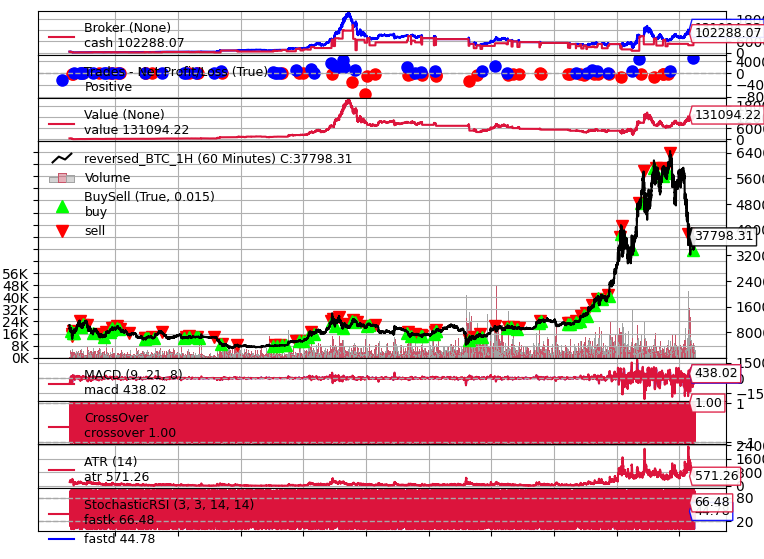

[[<Figure size 640x480 with 9 Axes>]]

In [3]:
cerebro.plot()